In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import import_data, process_data
from pca import find_pc, project_pca, plot_pca
from lowrank import fit_svd

%matplotlib inline

In [2]:
seed = 123
np.random.seed(seed)

In [3]:
df, mx_gdsc, list_drug, list_cell = import_data()

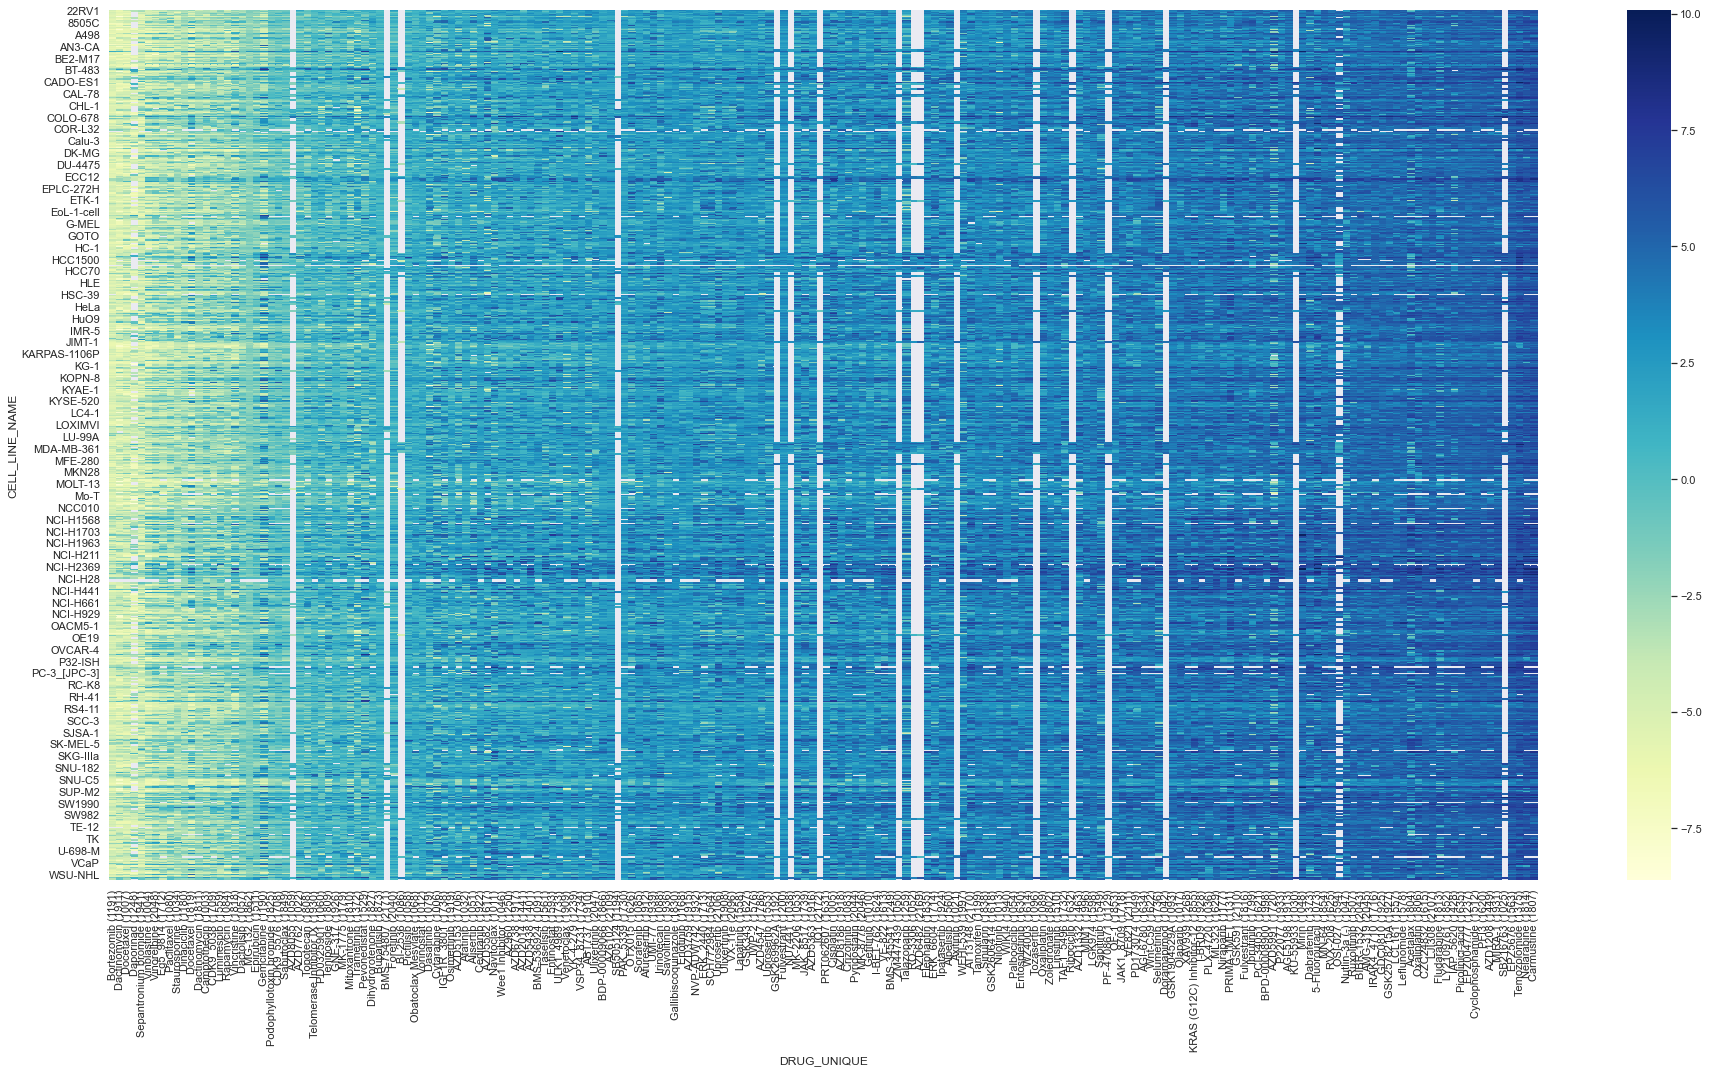

In [4]:
sns.set()
new_dims = (32, 16)
fig, ax = plt.subplots(figsize = new_dims)
ax = sns.heatmap(data = df, cmap="YlGnBu",
                 xticklabels=True);

In [5]:
mx_train, idx_test, idx_val, idx_train, mask_test, mask_val, mask_train = process_data(mx_gdsc)

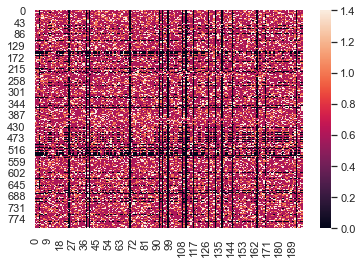

In [6]:
sns.heatmap(mask_train * 0.6 + mask_val * 0.8 + mask_test);

# Cluster by PCA

## Cells

In [7]:
eigenvalues_cell, eigenvectors_cell = find_pc(mx_train)

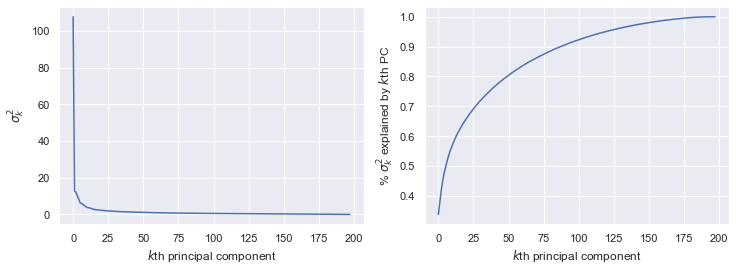

In [8]:
plot_pca(eigenvalues_cell, save=False)

In [9]:
mx_cell_pca2 = project_pca(mx_train, eigenvectors_cell, n_pc=2)

In [11]:
pd.DataFrame(mx_cell_pca2).to_csv("../assets/cell_pca2.csv")

## Drug

In [12]:
eigenvalues_drug, eigenvectors_drug = find_pc(mx_train.T)

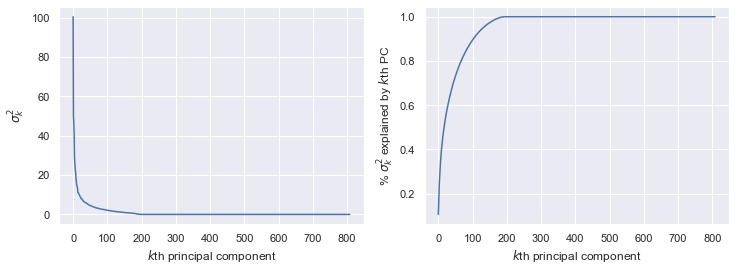

In [13]:
plot_pca(eigenvalues_drug, save=False)

In [14]:
mx_drug_pca2 = project_pca(mx_train.T, eigenvectors_drug, n_pc=2)

In [15]:
pd.DataFrame(mx_drug_pca2).to_csv("../assets/drug_pca2.csv")

# Cluster by Low-Rank Model

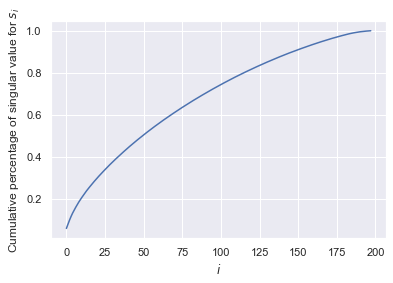

In [16]:
U, s, V = np.linalg.svd(mx_train, full_matrices=False)

plt.plot(range(len(s)), np.cumsum(s / np.sum(s)));
plt.xlabel('$i$');
plt.ylabel('Cumulative percentage of singular value for $s_i$');

In [17]:
ranks = np.arange(1,196,10)
error_train = np.zeros(len(ranks))
error_val = np.zeros(len(ranks))
sing_val = np.zeros((len(ranks), mx_train.shape[1]))

for idx, r in enumerate(ranks):
    print("Rank " + str(r))
    error, estimate, _, s, _ = fit_svd(mx_train, idx_train, n_iter=500, rank=r)
    error_train[idx] = error
    error_val[idx] = np.sqrt(np.mean((mx_train.flat[idx_val] - estimate.flat[idx_val])**2))
    sing_val[idx, :] = s

Rank 1
Rank 11
Rank 21
Rank 31
Rank 41
Rank 51
Rank 61
Rank 71
Rank 81
Rank 91
Rank 101
Rank 111
Rank 121
Rank 131
Rank 141
Rank 151
Rank 161
Rank 171
Rank 181
Rank 191


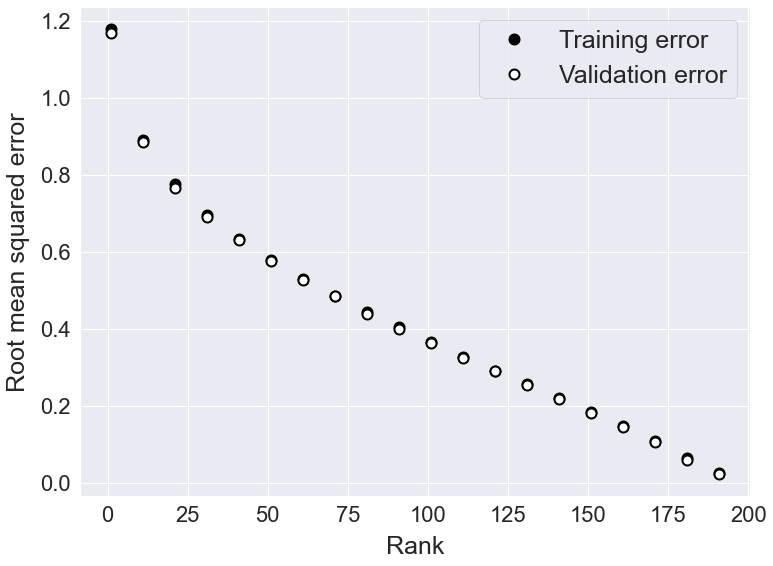

In [18]:
markersize = 10
font_size = 25
font_size_ticks = 22

plt.figure(figsize=(12,9));
plt.plot(ranks,error_train,linestyle="None",marker='o',ms=markersize,color="black",markeredgewidth=2,
                     markerfacecolor="black",label="Training error");
plt.plot(ranks,error_val,linestyle="None",marker='o',ms=markersize,color="black",markeredgewidth=2,
                     markerfacecolor="white",label="Validation error");
plt.ylabel('Root mean squared error',fontsize=font_size,labelpad=10);
plt.xlabel('Rank',fontsize=font_size,labelpad=10);
plt.xticks(fontsize=font_size_ticks);
plt.yticks(fontsize=font_size_ticks);
plt.legend(fontsize=font_size);
# plt.savefig('plots/collaborative_filtering_errors.pdf',bbox_inches="tight")

In [19]:
error, estimate, U, s, V = fit_svd(mx_train, idx_train, n_iter=100, rank=50)

In [21]:
n = 10
idx_top = np.zeros((n, n))
idx_bottom = np.zeros((n, n))

for i in range(n):
    idx_bottom[i, :] = np.argsort(V[:, i])[:n]
    idx_top[i, :] = np.argsort(V[:, i])[-n:]

# print(idx_bottom)
# print()
# print(idx_top)
# print()

# for x in range(n):
#     print("Top factor u{0}".format(x+1))
#     print([U[int(i), x] for i in idx_top[x, :]])
#     print("Bottom factor u{0}".format(x+1))
#     print([U[int(i), x] for i in idx_bottom[x, :]])
#     print()

for x in range(n):
    print("Top drugs factor v{0}".format(x+1))
    print([list_drug[int(i)] for i in idx_top[x, :]])
    print("Bottom drugs factor v{0}".format(x+1))
    print([list_drug[int(i)] for i in idx_bottom[x, :]])
    print()

Top drugs factor v1
['Gemcitabine (1190)', 'Luminespib (1559)', 'Camptothecin (1003)', 'Daporinad (1248)', 'Mitoxantrone (1810)', 'Trametinib (1372)', 'AZD8055 (1059)', 'BI-2536 (1086)', 'GNE-317 (1926)', 'AZD7762 (1022)']
Bottom drugs factor v1
['Carmustine (1807)', 'Dactinomycin (1811)', 'Buparlisib (1873)', 'Podophyllotoxin bromide (1825)', 'Afatinib (1032)', 'Teniposide (1809)', 'Telomerase Inhibitor IX (1930)', 'Paclitaxel (1080)', 'Foretinib (2040)', 'Cytarabine (1006)']

Top drugs factor v2
['Talazoparib (1259)', 'PRIMA-1MET (1131)', 'AZD4547 (1786)', 'AT13148 (2170)', 'SCH772984 (1564)', 'RO-3306 (1052)', 'AZD2014 (1441)', 'XAV939 (1268)', 'Lapatinib (1558)', 'Olaparib (1017)']
Bottom drugs factor v2
['Entospletinib (1630)', 'ERK_6604 (1714)', 'IGF1R_3801 (1738)', 'Dactinomycin (1811)', 'BMS-345541 (1249)', 'YK-4-279 (1239)', 'WIKI4 (1940)', 'AZD3759 (1915)', 'I-BET-762 (1624)', 'Mirin (1048)']

Top drugs factor v3
['AZD1208 (1449)', 'Selumetinib (1736)', 'Eg5_9814 (1712)', 'Af